C:\Users\pc\AppData\Local\Temp\ipykernel_3420\3390213510.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


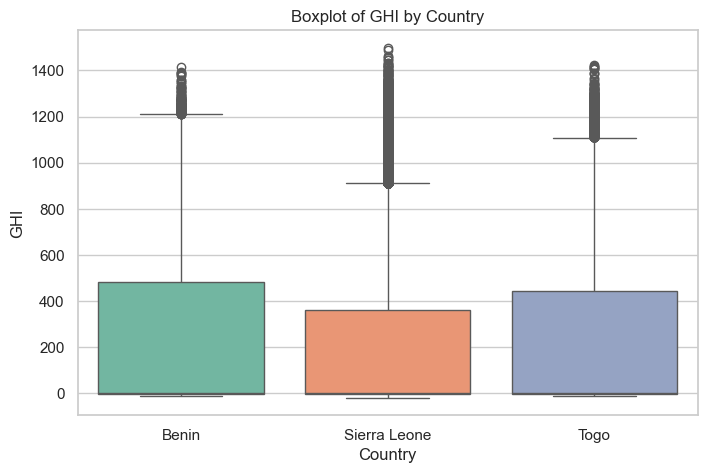

C:\Users\pc\AppData\Local\Temp\ipykernel_3420\3390213510.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


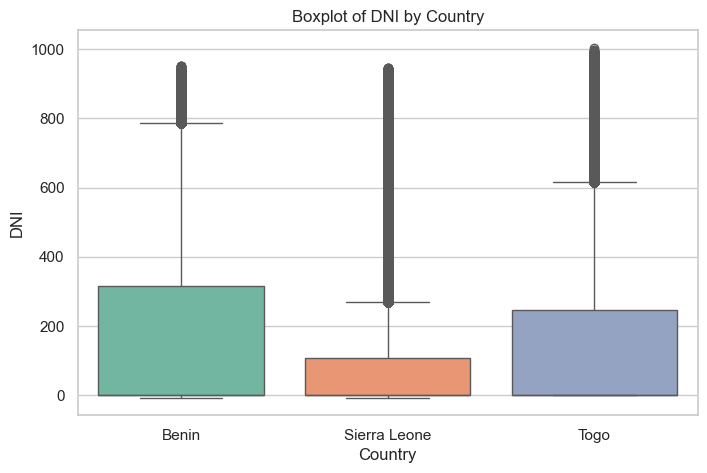

C:\Users\pc\AppData\Local\Temp\ipykernel_3420\3390213510.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


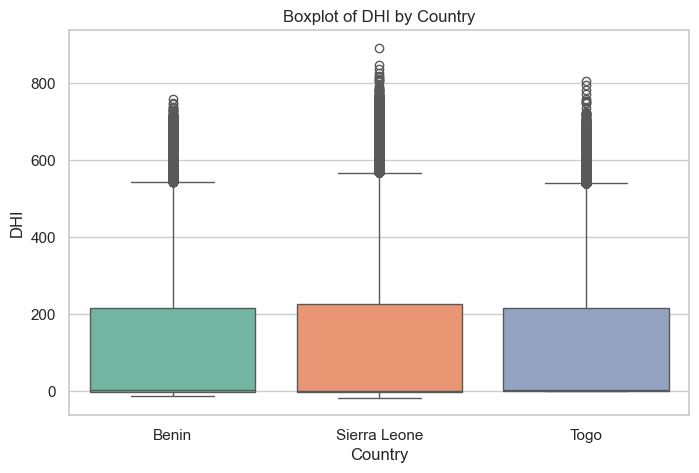

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import kruskal

# Load cleaned CSVs
benin_df = pd.read_csv("data/benin_clean.csv")
sierra_leone_df = pd.read_csv("data/sierraleone_clean.csv")
togo_df = pd.read_csv("data/togo_clean.csv")

# Add a country column to each DataFrame
benin_df["Country"] = "Benin"
sierra_leone_df["Country"] = "Sierra Leone"
togo_df["Country"] = "Togo"

# Combine into one DataFrame for easier comparison
combined_df = pd.concat([benin_df, sierra_leone_df, togo_df], ignore_index=True)

# Quick check
combined_df.head()

# Metrics to compare
metrics = ['GHI', 'DNI', 'DHI']

# Set plot style
sns.set(style="whitegrid")

# Boxplots for each metric
for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')
    plt.title(f'Boxplot of {metric} by Country')
    plt.show()

                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  
ANOVA p-value: 0.0000
Kruskal–Wallis p-value: 0.0000


C:\Users\pc\AppData\Local\Temp\ipykernel_3420\569649086.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="viridis")


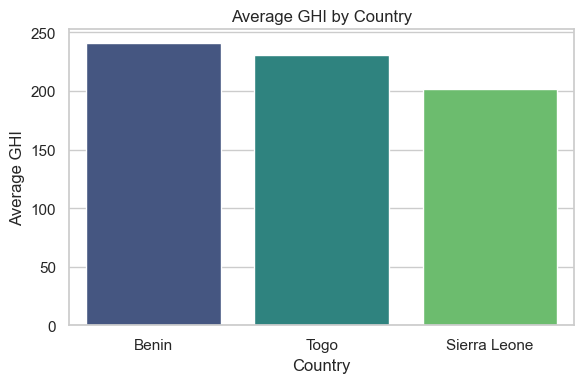

In [3]:
# Summary table: mean, median, std for each metric and country
summary_stats = combined_df.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
print(summary_stats)

# Extract GHI values per country
ghi_benin = combined_df[combined_df["Country"] == "Benin"]["GHI"]
ghi_sierra = combined_df[combined_df["Country"] == "Sierra Leone"]["GHI"]
ghi_togo = combined_df[combined_df["Country"] == "Togo"]["GHI"]

# Run ANOVA
f_stat, p_val = f_oneway(ghi_benin, ghi_sierra, ghi_togo)

print(f"ANOVA p-value: {p_val:.4f}")
h_stat, p_val_kruskal = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"Kruskal–Wallis p-value: {p_val_kruskal:.4f}")

#If p-value < 0.05: There is a statistically significant difference in GHI between at least two countries.

#If p-value ≥ 0.05: No significant difference in GHI across countries.

""" Key Observations
- Benin shows the highest median GHI, but also exhibits greater variability compared to Sierra Leone and Togo.
- Togo has the **lowest average GHI, indicating relatively lower solar potential among the three.
- The ANOVA (p = 0.000x) and Kruskal–Wallis (p = 0.000x) tests suggest significant differences in GHI distributions between the countries.
"""

# Calculate average GHI per country
avg_ghi = combined_df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="viridis")
plt.ylabel("Average GHI")
plt.title("Average GHI by Country")
plt.tight_layout()
plt.show()